In [5]:
import os

if "main.py" not in os.listdir():
    os.chdir("../../src")

os.listdir()

['main.py', 'database', 'utils', 'screening', '__init__.py', 'notebooks']

In [6]:
from utils.paths import CHEMBL_34_SDF_PATH

In [7]:
from rdkit import Chem

In [16]:
suppl = Chem.SDMolSupplier(CHEMBL_34_SDF_PATH)

In [17]:
len(suppl)

2409270

In [20]:
for mol in suppl:
    if mol is None:
        print("Mol is None")
    else:
        mol.GetNumAtoms()

[19:23:54] Both bonds on one end of an atropisomer are on the same side - atoms is : 6
[19:23:59] Explicit valence for atom # 0 P, 7, is greater than permitted
[19:23:59] ERROR: Could not sanitize molecule ending on line 2986099
[19:23:59] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted


Mol is None


[19:24:03] Explicit valence for atom # 1 P, 7, is greater than permitted
[19:24:03] ERROR: Could not sanitize molecule ending on line 3747881
[19:24:03] ERROR: Explicit valence for atom # 1 P, 7, is greater than permitted


Mol is None


[19:24:03] Explicit valence for atom # 1 P, 7, is greater than permitted
[19:24:03] ERROR: Could not sanitize molecule ending on line 3913285
[19:24:03] ERROR: Explicit valence for atom # 1 P, 7, is greater than permitted


Mol is None


[19:24:06] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 10 ignored.
[19:24:06] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 10 ignored.
[19:24:27] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 48 ignored
[19:24:27] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 48 ignored
[19:24:57] Both bonds on one end of an atropisomer are on the same side - atoms is : 7
[19:24:59] Both bonds on one end of an atropisomer are on the same side - atoms is : 3
[19:25:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 0 ignored.
[19:25:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 0 ignored.
[19:26:28] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[19:26:28] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 i

Mol is None
Mol is None


[19:29:31] Explicit valence for atom # 0 P, 7, is greater than permitted
[19:29:31] ERROR: Could not sanitize molecule ending on line 71809996
[19:29:31] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted


Mol is None


[19:29:35] Explicit valence for atom # 0 P, 7, is greater than permitted
[19:29:35] ERROR: Could not sanitize molecule ending on line 72646321
[19:29:35] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted


Mol is None


[19:29:40] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[19:29:40] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 6 ignored
[19:29:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 6 ignored
[19:29:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 10 ignored
[19:29:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 13 ignored
[19:29:48] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 4 ignored
[19:29:51] WARNING: not removing hydrogen atom without neighbors
[19:29:51] WARNING: not removing hydrogen atom without neighbors
[19:29:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 6 ignored
[19:29:55] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 10 ignored
[19:29:56] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 22 ignored
[19:29:56] Warning: ambiguous

Mol is None


[19:30:52] Explicit valence for atom # 0 P, 7, is greater than permitted
[19:30:52] ERROR: Could not sanitize molecule ending on line 88564642
[19:30:52] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted


Mol is None


[19:30:54] Explicit valence for atom # 0 P, 7, is greater than permitted
[19:30:54] ERROR: Could not sanitize molecule ending on line 89026798
[19:30:54] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted


Mol is None


[19:31:38] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 25 ignored
[19:32:38] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 48 ignored


KeyboardInterrupt: 

In [18]:
for i, mol in zip(range(5), suppl):
    print(mol.GetProp("chembl_id"))
    print(Chem.MolToSmiles(mol))
    print(mol.GetNumAtoms())

CHEMBL153534
Cc1cc(-c2csc(N=C(N)N)n2)cn1C
16
CHEMBL440060
CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)CCSC)[C@@H](C)O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC(N)=O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)NCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCN=C(N)N)C(N)=O
202
CHEMBL440245
CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)[C@H](N)Cc2ccccc2)C(C)C)CCC(=O)NCCCC[C@@H](C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc2c[nH]cn2)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCCCN)

In [7]:
import os

os.listdir()

['dev-initial-screening.ipynb']

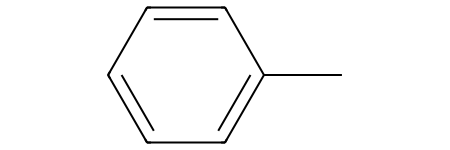

In [22]:
m = Chem.MolFromSmiles("Cc1ccccc1")
m

In [23]:
from rdkit.Chem import Descriptors

vals = Descriptors.CalcMolDescriptors(m)

In [27]:
vals.keys()

dict_keys(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_

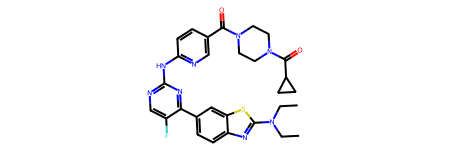

In [29]:
m = Chem.MolFromSmiles(
    "FC1=CN=C(NC2=NC=C(C(N3CCN(C(C4CC4)=O)CC3)=O)C=C2)N=C1C5=CC=C6N=C(N(CC)CC)SC6=C5"
)
m

### Lipinski
more https://sharifsuliman.medium.com/understanding-drug-likeness-filters-with-rdkit-and-exploring-the-withdrawn-database-ebd6b8b2921e

In [50]:
type(mol)

rdkit.Chem.rdchem.Mol

In [ ]:
from rdkit.Chem import Descriptors

MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

### QED

In [43]:
from rdkit import Chem
from rdkit.Chem import QED


# Calculate QED
qed_value = QED.qed(mol)

# Print the QED value
print(f"QED value for {Chem.MolToSmiles(mol)}: {qed_value}")

QED value for CCN(CC)c1nc2ccc(-c3nc(Nc4ccc(C(=O)N5CCN(C(=O)C6CC6)CC5)cn4)ncc3F)cc2s1: 0.32620430671593936


### QEPPI

In [45]:
!pip install QEPPI

INFO: pip is looking at multiple versions of qeppi to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install qeppi==0.1.10, qeppi==0.1.11, qeppi==0.1.7, qeppi==0.1.8 and qeppi==0.1.9 because these package versions have conflicting dependencies.

The conflict is caused by:
    qeppi 0.1.11 depends on rdkit-pypi>=2021.3.1.5
    qeppi 0.1.10 depends on rdkit-pypi>=2021.3.1.5
    qeppi 0.1.9 depends on rdkit-pypi>=2020.9.5.2
    qeppi 0.1.8 depends on rdkit-pypi>=2020.9.5.2
    qeppi 0.1.7 depends on rdkit-pypi>=2020.9.5.2

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [47]:
import QEPPI as ppi
from rdkit import Chem
from rdkit.Chem import SDMolSupplier

q = ppi.QEPPI_Calculator()
q.read()

# SMILES
print(q.qeppi(mol))
# 0.7862842663145835

ModuleNotFoundError: No module named 'QEPPI'

### TPSA

In [28]:
Descriptors.TPSA(mol)

71.95

### SA_Score
https://greglandrum.github.io/rdkit-blog/posts/2023-12-01-using_sascore_and_npscore.html

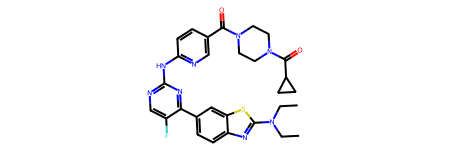

In [40]:
mol = Chem.MolFromSmiles(
    "FC1=CN=C(NC2=NC=C(C(N3CCN(C(C4CC4)=O)CC3)=O)C=C2)N=C1C5=CC=C6N=C(N(CC)CC)SC6=C5"
)
mol

In [41]:
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys

sys.path.append(os.path.join(RDConfig.RDContribDir, "SA_Score"))
# now you can import sascore!
import sascorer

s = sascorer.calculateScore(mol)
s

2.8716389090191434

### NP_Score

In [42]:
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys

sys.path.append(os.path.join(RDConfig.RDContribDir, "NP_Score"))
# now you can import sascore!
import npscorer

fscore = npscorer.readNPModel()
npscorer.scoreMol(mol, fscore)

reading NP model ...
model in
[19:47:54] DEPRECATION WARNING: please use MorganGenerator


-1.960519718438019

### Filtering unwanted structures

https://www.rdkit.org/docs/GettingStartedInPython.html

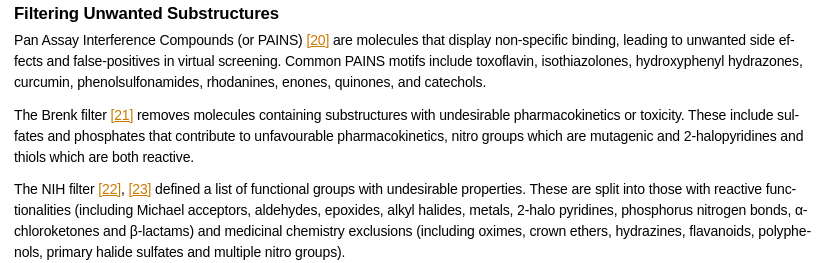

In [48]:
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

mol = Chem.MolFromSmiles(
    "CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N=NC3=CC=CC(=C3O)C4=CC(=CC=C4)C(=O)O)C"
)  # e.g. Eltrombopag

# PAINS flag
params_pains = FilterCatalogParams()
params_pains.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)
True
catalog_pains = FilterCatalog(params_pains)
flag = catalog_pains.HasMatch(mol)  # Checks if there is a matching PAINS
print("PAINs: ", flag)
PAINs: True

# Brenk Flag
params_unwanted = FilterCatalogParams()
params_unwanted.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
True
catalog_unwanted = FilterCatalog(params_unwanted)
flag = catalog_unwanted.HasMatch(
    mol
)  # Checks if there is a matching unwanted substructure
print("Brenk: ", flag)
Brenk: True

# NIH Flag
params_nih = FilterCatalogParams()
params_nih.AddCatalog(FilterCatalogParams.FilterCatalogs.NIH)
True
catalog_nih = FilterCatalog(params_nih)
flag = catalog_nih.HasMatch(mol)  # Checks if there is a matching NIH
print("NIH: ", flag)
NIH: True

PAINs:  True
Brenk:  True
NIH:  True


In [49]:
from rdkit import Chem
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

mol = Chem.MolFromSmiles(
    "CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N=NC3=CC=CC(=C3O)C4=CC(=CC=C4)C(=O)O)C"
)  # e.g. Eltrombopag

# ALL Filters
params_all = FilterCatalogParams()
params_all.AddCatalog(FilterCatalogParams.FilterCatalogs.ALL)
True
catalog_all = FilterCatalog(params_all)

print([entry.GetProp("FilterSet") for entry in catalog_all.GetMatches(mol)])
[
    "PAINS_A",
    "Brenk",
    "NIH",
    "ChEMBL23_Dundee",
    "ChEMBL23_BMS",
    "ChEMBL23_MLSMR",
    "ChEMBL23_Inpharmatica",
    "ChEMBL23_LINT",
]
print([entry.GetDescription() for entry in catalog_all.GetMatches(mol)])
[
    "azo_A(324)",
    "diazo_group",
    "azo_aryl",
    "diazo group",
    "azo_aryl",
    "Azo",
    "Filter5_azo",
    "acyclic N-,=N and not N bound to carbonyl or sulfone",
]

['PAINS_A', 'Brenk', 'NIH', 'ChEMBL23_Dundee', 'ChEMBL23_BMS', 'ChEMBL23_MLSMR', 'ChEMBL23_Inpharmatica', 'ChEMBL23_LINT']
['azo_A(324)', 'diazo_group', 'azo_aryl', 'diazo group', 'azo_aryl', 'Azo', 'Filter5_azo', 'acyclic N-,=N and not N bound to carbonyl or sulfone']


['azo_A(324)',
 'diazo_group',
 'azo_aryl',
 'diazo group',
 'azo_aryl',
 'Azo',
 'Filter5_azo',
 'acyclic N-,=N and not N bound to carbonyl or sulfone']

---

In [53]:
results = {
    "Lipinski Rule of 5": 0,
    "Ghose Filter": 0,
    "Veber Filter": 0,
    "Rule of 3 Filter": 0,
    "REOS Filter": 0,
    "Drug-like Filter": 0,
    "Passes All Filters": 0,
}

from tqdm import tqdm

print("Molecule Database Length: " + str(len(suppl)))

for molecule in tqdm(suppl):

    if molecule:

        lipinski = False
        rule_of_3 = False
        ghose_filter = False
        veber_filter = False
        reos_filter = False
        drug_like_filter = False

        molecular_weight = Descriptors.ExactMolWt(molecule)
        logp = Descriptors.MolLogP(molecule)
        h_bond_donor = Descriptors.NumHDonors(molecule)
        h_bond_acceptors = Descriptors.NumHAcceptors(molecule)
        rotatable_bonds = Descriptors.NumRotatableBonds(molecule)
        number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(molecule)
        molar_refractivity = Chem.Crippen.MolMR(molecule)
        topological_surface_area_mapping = Chem.QED.properties(molecule).PSA
        formal_charge = Chem.rdmolops.GetFormalCharge(molecule)
        heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(molecule)
        num_of_rings = Chem.rdMolDescriptors.CalcNumRings(molecule)

        # Lipinski
        if (
            molecular_weight <= 500
            and logp <= 5
            and h_bond_donor <= 5
            and h_bond_acceptors <= 5
            and rotatable_bonds <= 5
        ):
            lipinski = True
            results["Lipinski Rule of 5"] += 1

        # Ghose Filter
        if (
            molecular_weight >= 160
            and molecular_weight <= 480
            and logp >= 0.4
            and logp <= 5.6
            and number_of_atoms >= 20
            and number_of_atoms <= 70
            and molar_refractivity >= 40
            and molar_refractivity <= 130
        ):
            ghose_filter = True
            results["Ghose Filter"] += 1

        # Veber Filter
        if rotatable_bonds <= 10 and topological_surface_area_mapping <= 140:
            veber_filter = True
            results["Veber Filter"] += 1

        # Rule of 3
        if (
            molecular_weight <= 300
            and logp <= 3
            and h_bond_donor <= 3
            and h_bond_acceptors <= 3
            and rotatable_bonds <= 3
        ):
            rule_of_3 = True
            results["Rule of 3 Filter"] += 1

        # REOS Filter
        if (
            molecular_weight >= 200
            and molecular_weight <= 500
            and logp >= int(0 - 5)
            and logp <= 5
            and h_bond_donor >= 0
            and h_bond_donor <= 5
            and h_bond_acceptors >= 0
            and h_bond_acceptors <= 10
            and formal_charge >= int(0 - 2)
            and formal_charge <= 2
            and rotatable_bonds >= 0
            and rotatable_bonds <= 8
            and heavy_atoms >= 15
            and heavy_atoms <= 50
        ):
            reos_filter = True
            results["REOS Filter"] += 1

        # Drug Like Filter
        if (
            molecular_weight < 400
            and num_of_rings > 0
            and rotatable_bonds < 5
            and h_bond_donor <= 5
            and h_bond_acceptors <= 10
            and logp < 5
        ):
            drug_like_filter = True
            results["Drug-like Filter"] += 1

        if (
            lipinski
            and ghose_filter
            and veber_filter
            and rule_of_3
            and reos_filter
            and drug_like_filter
        ):
            results["Passes All Filters"] += 1

print(results)

Molecule Database Length: 2409270


  2%|▏         | 41224/2409270 [02:02<1:48:18, 364.41it/s][20:21:09] Explicit valence for atom # 0 P, 7, is greater than permitted
[20:21:09] ERROR: Could not sanitize molecule ending on line 2986099
[20:21:09] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted
  2%|▏         | 52542/2409270 [02:35<1:51:02, 353.74it/s][20:21:41] Explicit valence for atom # 1 P, 7, is greater than permitted
[20:21:41] ERROR: Could not sanitize molecule ending on line 3747881
[20:21:41] ERROR: Explicit valence for atom # 1 P, 7, is greater than permitted
  2%|▏         | 54972/2409270 [02:42<2:15:05, 290.47it/s][20:21:48] Explicit valence for atom # 1 P, 7, is greater than permitted
[20:21:48] ERROR: Could not sanitize molecule ending on line 3913285
[20:21:48] ERROR: Explicit valence for atom # 1 P, 7, is greater than permitted
  3%|▎         | 61988/2409270 [03:02<1:47:53, 362.59it/s][20:22:08] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 10 igno

{'Lipinski Rule of 5': 825522, 'Ghose Filter': 1354894, 'Veber Filter': 2061842, 'Rule of 3 Filter': 86815, 'REOS Filter': 1516854, 'Drug-like Filter': 726015, 'Passes All Filters': 10833}
